## Importing the correct libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv('products_campaign_sales.csv')

In [3]:
df

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529
...,...,...,...,...,...,...,...,...,...,...,...
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [5]:
df.isnull().sum()

limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              2
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64

In [6]:
df['price'].unique()

array([140., 144., 149., 141., 146., 143., 148., 154., 180., 147., 142.,
       169., 160., 183., 158., 151., 152., 150., 165., 132., 159., 179.,
       172., 186., 145., 191., 162., 173., 170., 193.,  nan, 167., 182.,
       157., 175., 188., 156., 178., 161., 155., 130., 139., 131., 192.,
       174., 138., 185., 168., 164., 181., 135., 153., 163., 166., 176.,
       177., 129., 184., 133., 171., 195., 100., 119., 197., 196., 189.,
       137., 125., 128., 136., 190., 187., 194.])

In [7]:
df['product_level'].unique()

array([1, 2, 3])

### Visual representation of data

<Axes: xlabel='discount_rate', ylabel='orders'>

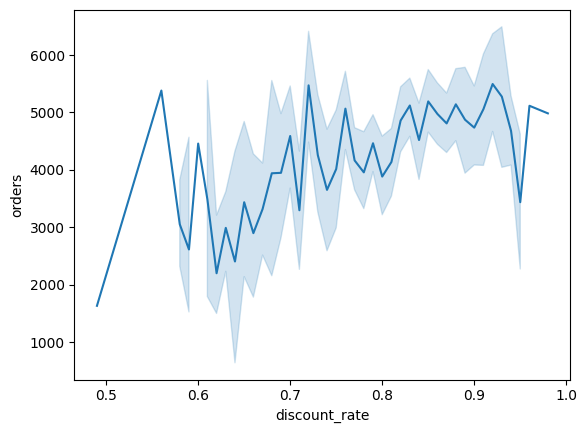

In [8]:
sns.lineplot(df, x='discount_rate', y='orders')

<Axes: xlabel='email_rate', ylabel='orders'>

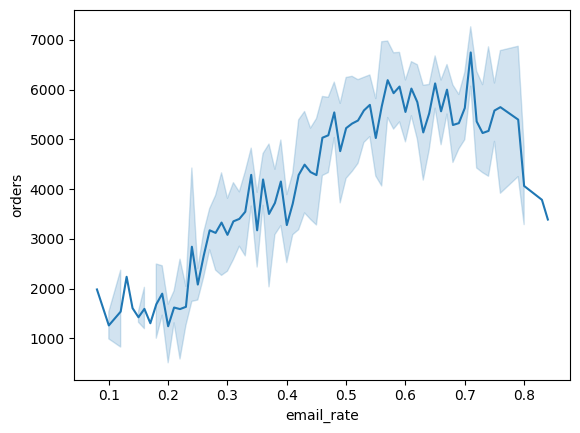

In [9]:
sns.lineplot(df, x='email_rate', y='orders')

<Axes: xlabel='campaign_level', ylabel='orders'>

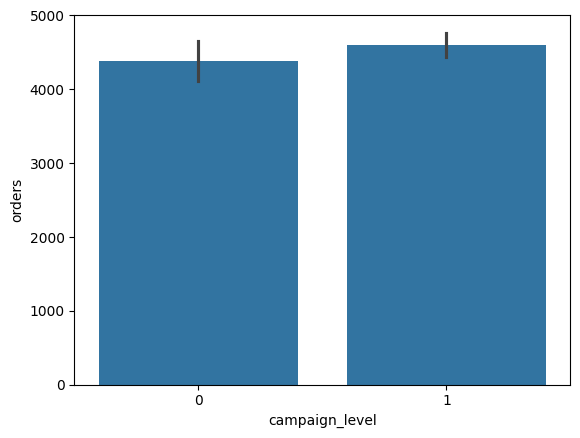

In [10]:
sns.barplot(df, x='campaign_level', y='orders')

<Axes: xlabel='price', ylabel='orders'>

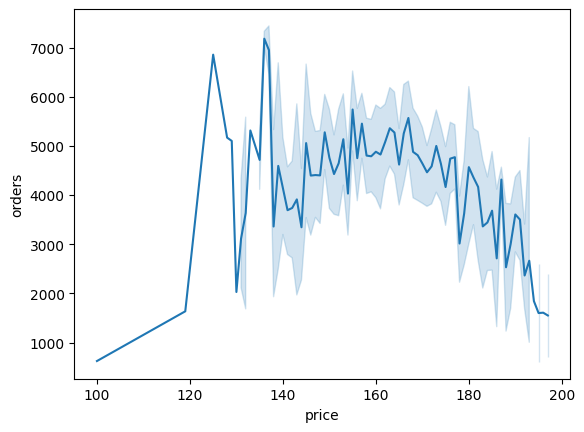

In [11]:
sns.lineplot(df, x='price', y='orders')

<Axes: xlabel='resource_amount', ylabel='orders'>

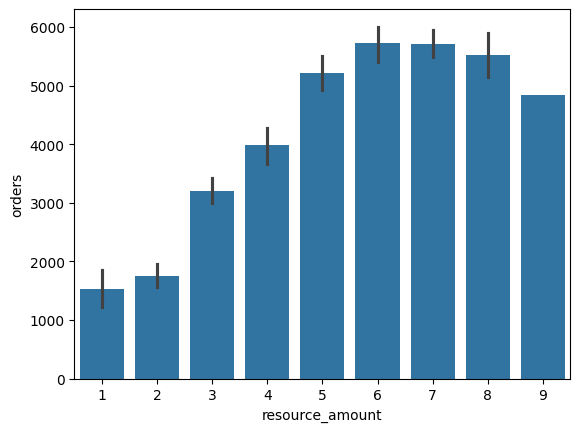

In [13]:
sns.barplot(df, x='resource_amount', y='orders')

<Axes: xlabel='hour_resouces', ylabel='orders'>

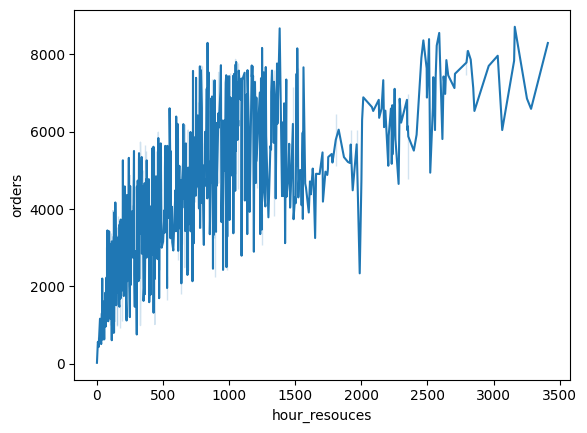

In [15]:
sns.lineplot(df,x='hour_resouces',y='orders')

In [14]:
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


### Training the model

In [16]:
import xgboost as xgb

In [17]:
from sklearn.model_selection import train_test_split

In [48]:
X = df[['discount_rate','email_rate','price','campaign_level',
       'campaign_fee','resource_amount']]
y = df['orders']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
xgb_model = xgb.XGBRegressor()

In [51]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
predictions = xgb_model.predict(X_test)

### Predictions

In [53]:
predictions

array([6998.013  , 1905.8036 , 4297.147  , 7904.3115 , 8616.849  ,
       4807.233  ,  833.0635 , 7373.4717 , 4876.736  , 7577.277  ,
       4846.4297 , 5905.1377 , 1201.1932 , 4585.611  ,  682.30096,
       2031.6666 , 3943.8755 , 5064.6025 , 1357.958  , 7789.9604 ,
       7333.2944 , 4375.3374 , 4199.298  , 2924.565  , 1381.7302 ,
       3019.4373 , 3126.142  , 7419.6396 , 4868.665  , 4671.588  ,
       5413.861  , 3964.9927 , 7823.923  , 4573.9    , 6764.8984 ,
       5512.336  , 4858.289  , 4950.644  , 3284.6362 , 1311.2886 ,
       3823.682  , 7106.462  , 4962.2534 , 4045.573  , 4886.331  ,
       4655.768  , 3642.2727 , 6021.41   , 7437.437  , 6637.868  ,
       1508.5895 , 4330.6934 , 5678.629  , 2781.299  , 1610.6132 ,
       2776.0713 , 1229.1625 , 1704.131  , 2217.5837 , 4818.5767 ,
       7796.238  , 5968.7144 , 3366.868  , 6685.1997 , 5721.6704 ,
       7646.106  , 7090.1025 , 3607.2588 , 1963.419  , 6091.5444 ,
       3091.6567 , 2307.6208 , 3277.4001 , 1164.0674 , 3722.19

In [54]:
print(predictions[:5])

[6998.013  1905.8036 4297.147  7904.3115 8616.849 ]


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Evaluation of model

In [56]:
xgb_r2 = r2_score(y_test, predictions)
print(f"XGBoost R-squared: {xgb_r2}")

XGBoost R-squared: 0.8936790823936462
